# Intro
Simple Program to load and check the 4STAR archive files.

For R0 of ORACLES, aod and Gases

# Load the defaults and imports

In [2]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import Sp_parameters as Sp
from load_utils import mat2py_time, toutc, load_ict
from Sp_parameters import smooth

In [3]:
from linfit import linfit

In [4]:
%matplotlib notebook

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [5]:
fp ='C:/Users/sleblan2/Research/ORACLES/'

# load the files

In [6]:
days = ['20160827','20160830','20160831','20160902','20160904','20160906','20160908',
       '20160910','20160912','20160914','20160918','20160920','20160924','20160925','20160927']

In [5]:
days = ['20160920']#,'20160927','20160929','20160930']#,'20160825']

In [7]:
vv = 'R0'

In [8]:
outaod_RA = []
outaod_head_RA = []
outgas_RA = []
outgas_head_RA = []
for d in days:
    fname_aod = fp+'aod_ict/4STAR-AOD_P3_{}_{vv}.ict'.format(d,vv=vv)
    tt,th = load_ict(fname_aod,return_header=True)
    outaod_RA.append(tt)
    outaod_head_RA.append(th)
    
    #fname_gas = fp+'gas_ict/korusaq-4STAR-GASES_DC8_{}_RA.ict'.format(d)
    #ttr,thr = load_ict(fname_gas,return_header=True)
    #outgas_RA.append(ttr)
    #outgas_head_RA.append(thr)

('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AOD1040', 'AOD1064', 'AOD1236', 'AOD1559', 'AOD1627')
('Start_UTC', 'Latitude', 'Longitude', 'GPS_Alt', 'qual_flag', 'amass_aer', 'AOD0380', 'AOD0452', 'AOD0501', 'AOD0520', 'AOD0532', 'AOD0550', 'AOD0606', 'AOD0620', 'AOD0675', 'AOD0781', 'AOD0865', 'AOD1020', 'AO

## Check the files for integrity and header info

In [38]:
for i,s in enumerate(outaod_head_RA[0]):
    for ig,g in enumerate(outaod_head_RA):
        if not s==g[i]:
            print 'no match on {vv} aod string line {}: {} and {vv} of num {}:{} '.format(i,s,ig,g[i],vv=vv)
#    for ir,r in enumerate(outgas_head_RA):
#        if not s==r[i]:
#            print 'no match on RA gas string line {}: {} and RA of num {}:{} '.format(i,s,ir,r[i])

no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 1:2016, 08, 30, 2016, 09, 04
 
no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 2:2016, 08, 31, 2016, 09, 04
 
no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 3:2016, 09, 02, 2016, 09, 04
 
no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 4:2016, 09, 04, 2016, 09, 05
 
no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 5:2016, 09, 06, 2016, 09, 07
 
no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 6:2016, 09, 08, 2016, 09, 09
 
no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 7:2016, 09, 10, 2016, 09, 14
 
no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 8:2016, 09, 12, 2016, 09, 14
 
no match on R0 aod string line 6: 2016, 08, 27, 2016, 10, 10
 and R0 of num 9:2016, 09, 14, 2016, 09, 18
 
no match on R0 aod string line 6: 201

In [39]:
print 'day:       AOD {vv}     GAS {vv}'.format(vv=vv)
for i,d in enumerate(days):
    try:
        print '{}: {}  {}'.format(d,len(outaod_RA[i]['Start_UTC']),len(outgas_RA[i]['Start_UTC']))
    except:
        print '{}: missed'.format(d)

day:       AOD R0     GAS R0
20160827: missed
20160830: missed
20160831: missed
20160902: missed
20160904: missed
20160906: missed
20160908: missed
20160910: missed
20160912: missed
20160914: missed
20160918: missed
20160920: missed
20160924: missed
20160925: missed
20160927: missed


In [9]:
outaod_head_RA[0]

['56, 1001\n',
 'Jens Redemann\n',
 'NASA Ames Research Center\n',
 'Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)\n',
 'ORACLES 2016\n',
 '1, 1\n',
 '2016, 08, 27, 2016, 10, 10\n',
 '1\n',
 'Start_UTC, seconds, Elapsed seconds from 0 hours UT on day: 20160827\n',
 '22\n',
 '1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n',
 '-9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999\n',
 'Latitude, deg, Aircraft latitude (deg) at the indicated time\n',
 'Longitude, deg, Aircraft longitude (deg) at the indicated time\n',
 'GPS_Alt, m, Aircraft GPS geometric altitude (m) at the indicated time\n',
 'qual_flag, unitless, quality of retrieved AOD: 0=good; 1=poor, due to clouds, tracking errors, or instrument stability\n',
 'amass_aer, unitless, aerosol optical airmass\n',
 'AOD0380, unitless, Aerosol optical depth at 380.0 nm\n',
 'AOD0452, unitless, 

In [41]:
outgas_head_RA[0]

IndexError: list index out of range

## Check the variables in header

In [10]:
nm = outaod_RA[0].dtype.names

In [11]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD0380',
 'AOD0452',
 'AOD0501',
 'AOD0520',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0675',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1559',
 'AOD1627')

In [12]:
wl = nm[6:-1]

<IPython.core.display.Javascript object>


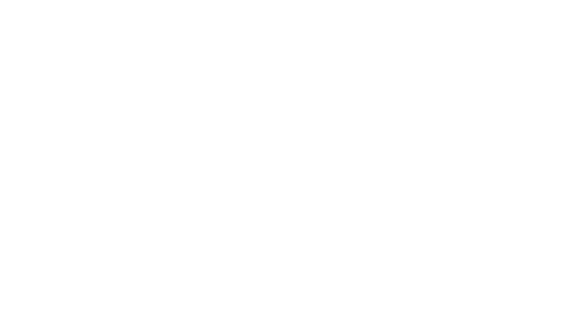

NameError: name 'out_R2' is not defined

In [15]:
plt.figure()
plt.plot(out_R2[0][nm[0]],out_R2[0][nm[9]],'.')
for x in out_R2[0][nm[0]][np.where(out_R2[0][nm[4]]==1)[0]]:
    plt.axvline(x,color='#DDDDDD',alpha=0.02)

In [45]:
for a in wl:
    print a

AOD0380
AOD0452
AOD0501
AOD0520
AOD0532
AOD0550
AOD0606
AOD0620
AOD0675
AOD0781
AOD0865
AOD1020
AOD1040
AOD1064
AOD1236
AOD1559


# Plot the files

<IPython.core.display.Javascript object>


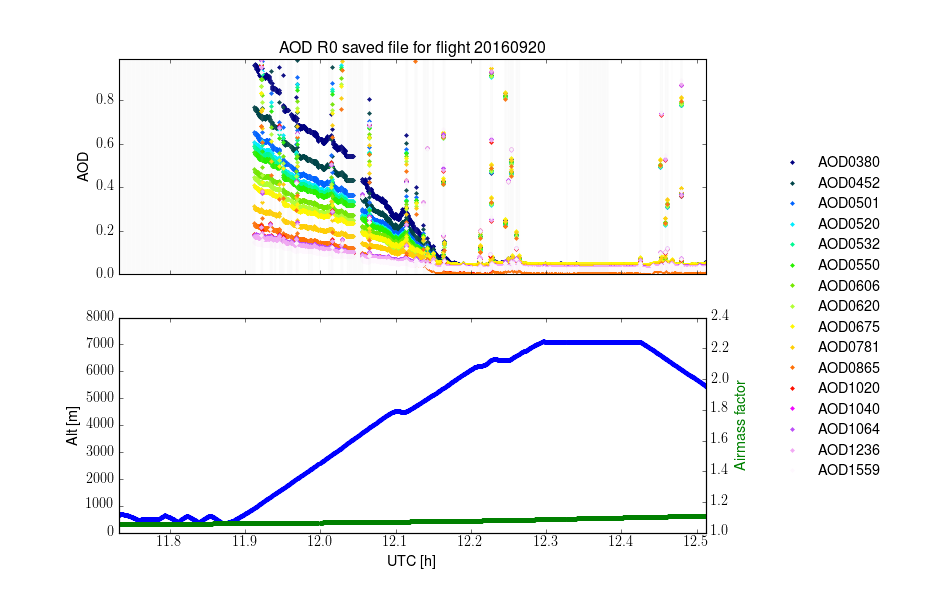

In [16]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('AOD {} saved file for flight {}'.format(vv,d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    for aod in wl:
        ax[0].plot(outaod_RA[i][nm[0]],outaod_RA[i][aod],'.',label=aod)
    try:
        for x in outaod_RA[i][nm[0]][np.where(outaod_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,1)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/{vv}_{}.png'.format(d,vv=vv),dpi=600,transparent=True)

In [17]:
ax[0].set_ylim(0,15)

(0, 15)

In [18]:
fig.show()

In [20]:
nm

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'qual_flag',
 'amass_aer',
 'AOD0380',
 'AOD0452',
 'AOD0501',
 'AOD0520',
 'AOD0532',
 'AOD0550',
 'AOD0606',
 'AOD0620',
 'AOD0675',
 'AOD0781',
 'AOD0865',
 'AOD1020',
 'AOD1040',
 'AOD1064',
 'AOD1236',
 'AOD1559',
 'AOD1627')

<IPython.core.display.Javascript object>


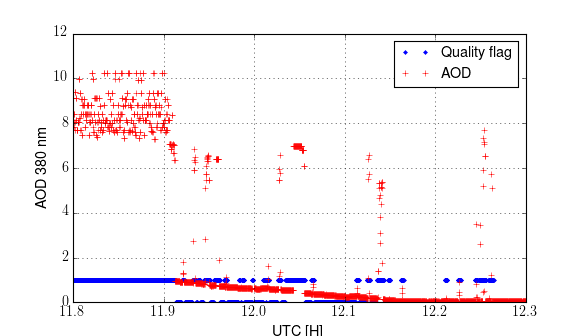

In [30]:
plt.figure()
plt.plot(outaod_RA[0]['Start_UTC'],outaod_RA[0]['qual_flag'],'b.',label='Quality flag')
plt.plot(outaod_RA[0]['Start_UTC'],outaod_RA[0]['AOD0380'],'r+',label='AOD')
plt.ylim(0,12)
plt.xlim(11.8,12.3)
plt.ylabel('AOD 380 nm')
plt.xlabel('UTC [H]')
plt.legend()
plt.grid()
plt.savefig(fp+'aod_ict/{vv}_20160920_zoom_QA_flag.png'.format(vv=vv),dpi=600,transparent=True)

## Make plots of angstrom exponent

In [46]:
def calc_angs(time,w,aod,flag):
    'Program to calculate the angstrom exponent by fitting linearly on the aod'
    ang = np.zeros_like(time)
    for i,t in enumerate(time):
        if not flag[i]==1:
            c,cm = linfit(np.log10(w),-np.log10(aod[:,i]))
            p = np.array([c[1],c[0]])
            ang[i] = c[0] 
        else:
            ang[i] = np.nan
        if (ang[i]<1.0) & (aod[2,i]>0.8):
            ang[i] = np.nan
    return ang

In [47]:
wls = [0.38,0.452,0.501,0.520,0.532,0.55,0.606,0.620,0.675,0.781,0.865,1.02,1.04,1.064,1.236,1.559]

In [48]:
aodrr, angarr = [],[]
for i,d in enumerate(days):
    aodarr = []
    for w in wl:
        aodarr.append(outaod_RA[i][w])
    aodarr = np.array(aodarr)

    ang = calc_angs(outaod_RA[i][nm[0]],wls,aodarr,outaod_RA[i][nm[4]])
    aodrr.append(aodarr)
    angarr.append(ang)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log10
linfit.py:268: RuntimeWarning: invalid value encountered in add
  resids = y - (yint + slope*x)
linfit.py:268: RuntimeWarning: invalid value encountered in subtract
  resids = y - (yint + slope*x)
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log10
linfit.py:224: RuntimeWarning: invalid value encountered in double_scalars
  yint = (sy - sx * slope)/s


<IPython.core.display.Javascript object>


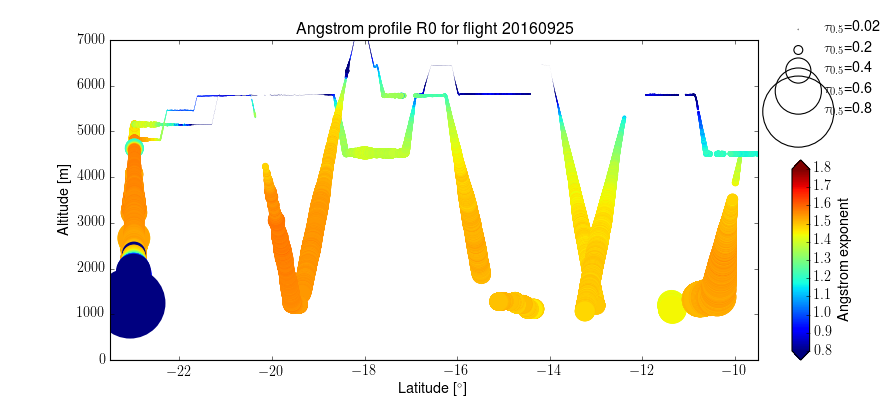

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in power


In [36]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(1,sharex=True,figsize=(11,5))
    ax.set_title('Angstrom profile {} for flight {}'.format(vv,d))
    v = ax.scatter(outaod_RA[i]['Latitude'],outaod_RA[i]['GPS_Alt'],(20*outaod_RA[i][wl[2]])**3.0,c=angarr[i],
                   marker='o',edgecolor='None',vmin=0.8,vmax=1.8)
    ax.set_ylabel('Altitude [m]')
    ax.set_ylim(0,7000)
    ax.set_xlim(-23.5,-9.5)
    ax.axhline(0,color='k')
    ax.set_xlabel('Latitude [$^\\circ$]')
   
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
    
    cbaxes = fig.add_axes([0.9, 0.1, 0.02, 0.5]) 
    cbar =  plt.colorbar(v,extend='both',cax=cbaxes)
    cbar.set_label('Angstrom exponent')
    
    sizes = [0.02,0.2,0.4,0.6,0.8]
    labels = ['$\\tau_{{0.5}}$={0}'.format(s) for s in sizes]
    points = [ax.scatter([], [], s=(20*s)**3.0, c='None',marker='o',edgecolor='k') for s in sizes]
    plt.legend(points, labels, scatterpoints=1,frameon=False,loc='upper left',bbox_to_anchor=(-1.2,1.75))
    
    plt.savefig(fp+'aod_ict/{vv}_{}_lat_alt_angstrom.png'.format(d,vv=vv),dpi=600,transparent=True)

# Combine all the data in a single array

In [49]:
ar = {}
for n in nm:
    ar[n] = np.array([])

In [50]:
ar['days'] = np.array([])

In [51]:
for i,d in enumerate(days):
    ar['days'] = np.append(ar['days'],np.zeros_like(outaod_RA[i]['Start_UTC'])+i)
    for n in nm:
        ar[n] = np.append(ar[n],outaod_RA[i][n])

In [52]:
ar['GPS_Alt'].shape

(403358L,)

In [53]:
ar.keys()

['AOD1040',
 'AOD0532',
 'AOD1020',
 'AOD1627',
 'AOD0606',
 'AOD1559',
 'AOD1064',
 'AOD0620',
 'Latitude',
 'AOD0550',
 'AOD0452',
 'qual_flag',
 'AOD0520',
 'AOD0501',
 'Longitude',
 'AOD0675',
 'AOD1236',
 'AOD0380',
 'Start_UTC',
 'days',
 'AOD0781',
 'AOD0865',
 'amass_aer',
 'GPS_Alt']

## filter for low altitudes

In [54]:
ar['fl_alt'] = (ar['GPS_Alt']>600) & (ar['GPS_Alt']<1800)

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [55]:
ar['fl_alt_6'] = ar['GPS_Alt']<=600

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


In [56]:
ar['fl_alt_18'] = ar['GPS_Alt']>=1800

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater_equal
  if __name__ == '__main__':


In [57]:
ar['fl_QA'] = ar['qual_flag']==0

In [58]:
ar['fl'] = ar['fl_QA']&ar['fl_alt']

In [59]:
ar['fl1'] = ar['fl_QA']&ar['fl_alt_6']

In [60]:
ar['fl2'] = ar['fl_QA']&ar['fl_alt_18']

## save to file

In [61]:
import hdf5storage as hs

In [62]:
hs.savemat(fp+'/aod_ict/all_aod_ict.mat',ar)

## Optionally load the file

In [1]:
import hdf5storage as hs

In [8]:
ar = hs.loadmat(fp+'/aod_ict/all_aod_ict.mat')

## Plot a histogram of all the AOD

In [10]:
from plotting_utils import prelim

<IPython.core.display.Javascript object>


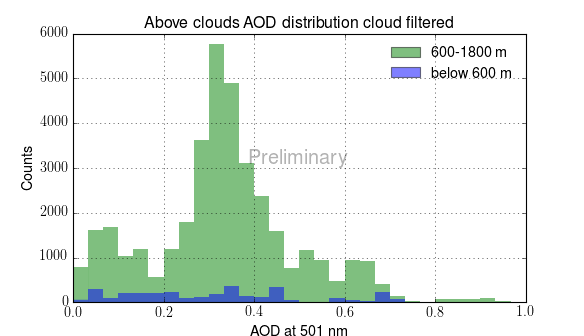

In [11]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='g',label='600-1800 m')
plt.hist(ar['AOD0501'][ar['fl1']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='b',label='below 600 m')
#plt.hist(ar['AOD0501'][ar['fl2']],bins=30,range=(0,1.0),alpha=0.5,normed=False,edgecolor='None',color='r',label='above 1800 m')
#plt.yscale('log')
plt.xlabel('AOD at 501 nm')
plt.ylabel('Counts')
plt.grid()
plt.title('Above clouds AOD distribution cloud filtered')
prelim()
plt.legend(frameon=False)
plt.savefig(fp+'aod_ict/{vv}_AOD_histogram.png'.format(vv=vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


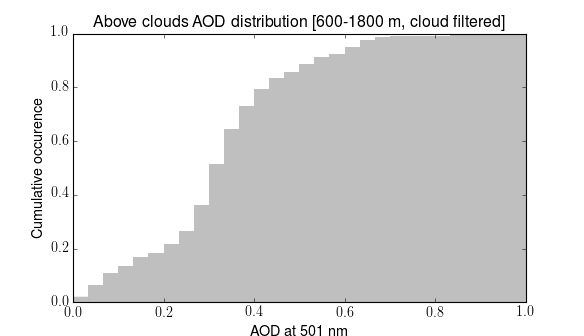

In [67]:
plt.figure()
plt.hist(ar['AOD0501'][ar['fl']],bins=30,range=(0,1.0),alpha=0.5,normed=True,edgecolor='None',color='grey',cumulative=True)
plt.xlabel('AOD at 501 nm')
plt.ylabel('Cumulative occurence')
plt.title('Above clouds AOD distribution [600-1800 m, cloud filtered]')
plt.savefig(fp+'aod_ict/{vv}_AOD_histogram_cum.png'.format(vv=vv),dpi=600,transparent=True)

# Make histogram for each flight 

In [16]:
i

0

In [17]:
np.nanmean(outaod_RA[i]['AOD0501'][fl])

0.10529032258064516

<IPython.core.display.Javascript object>


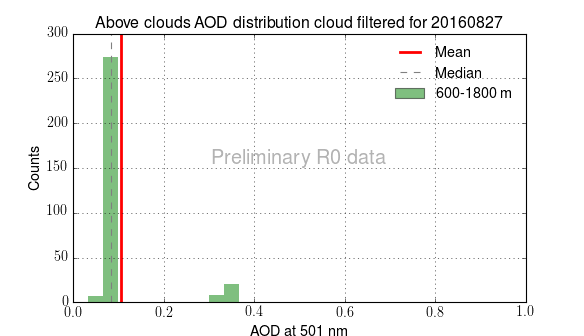

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in greater
C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


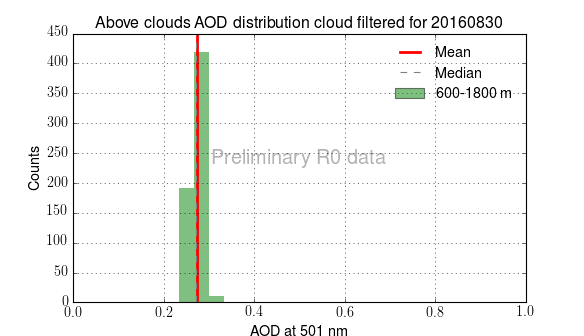

<IPython.core.display.Javascript object>


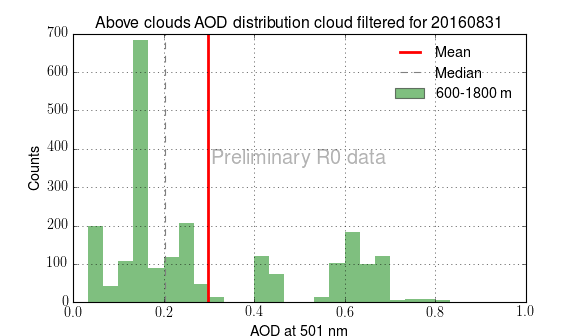

<IPython.core.display.Javascript object>


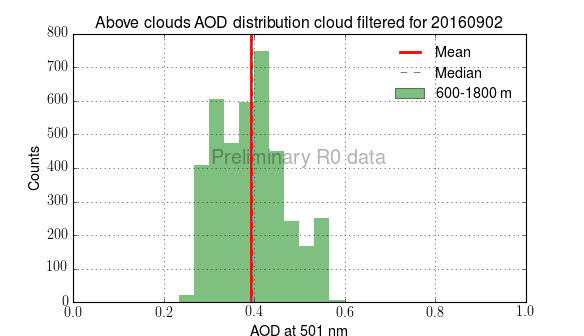

<IPython.core.display.Javascript object>


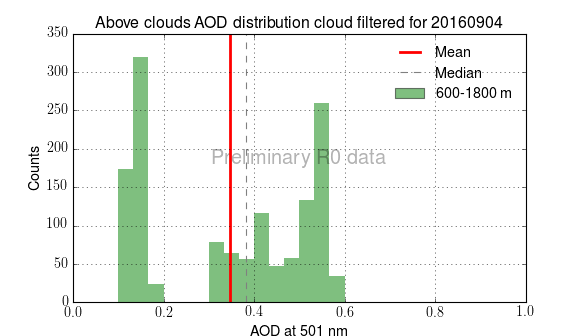

<IPython.core.display.Javascript object>


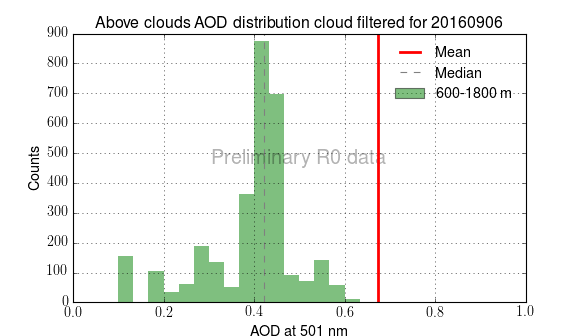

<IPython.core.display.Javascript object>


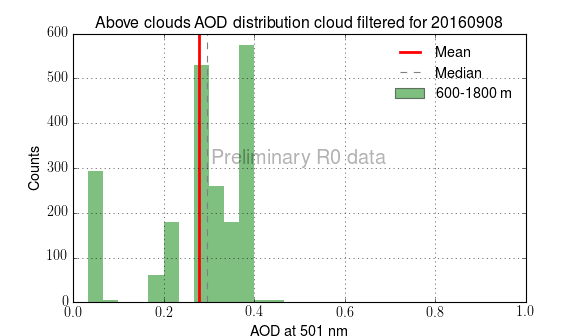

<IPython.core.display.Javascript object>


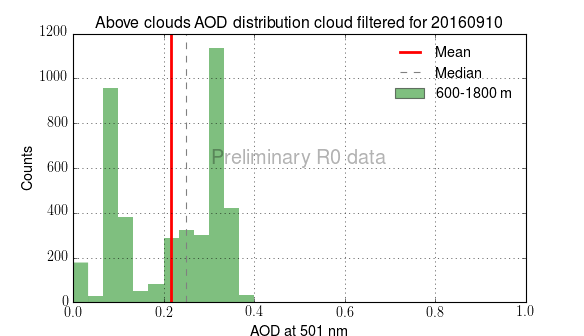

<IPython.core.display.Javascript object>


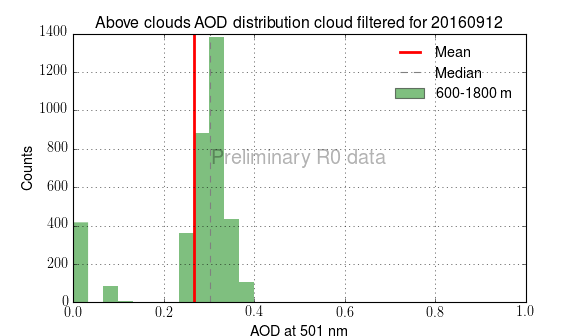

<IPython.core.display.Javascript object>


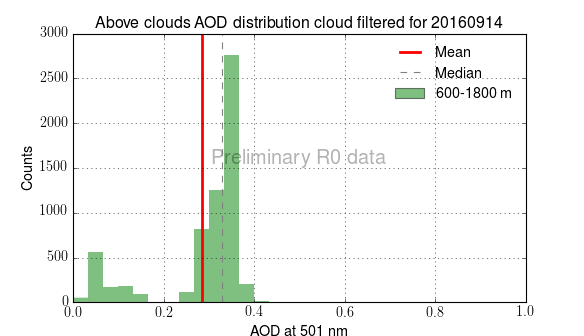

<IPython.core.display.Javascript object>


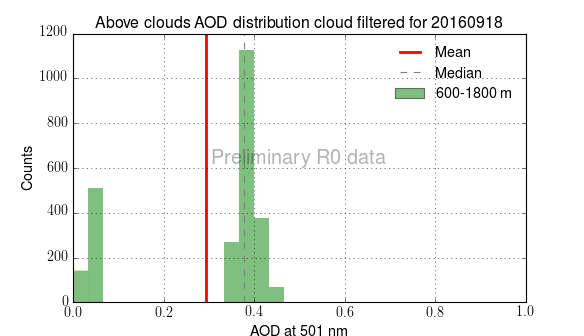

<IPython.core.display.Javascript object>


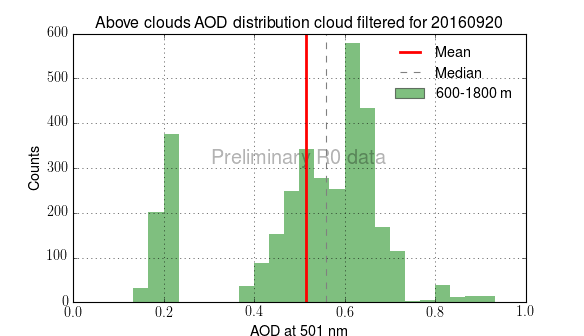

<IPython.core.display.Javascript object>


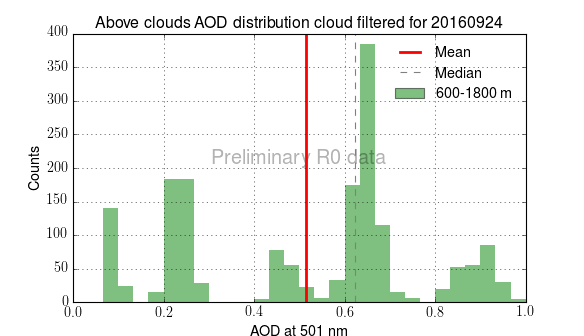

<IPython.core.display.Javascript object>


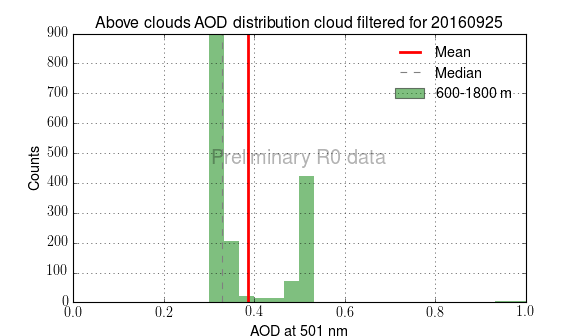

<IPython.core.display.Javascript object>


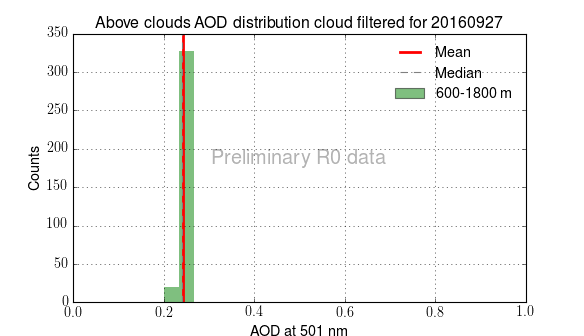

In [29]:
for i,d in enumerate(days):
    plt.figure()
    
    fl_alt = (outaod_RA[i]['GPS_Alt']>600) & (outaod_RA[i]['GPS_Alt']<1800)
    fl_QA = outaod_RA[i]['qual_flag']==0
    fl = fl_alt & fl_QA
    
    plt.hist(outaod_RA[i]['AOD0501'][fl],bins=30,range=(0,1.0),alpha=0.5,normed=False,
             edgecolor='None',color='g',label='600-1800 m')
    plt.axvline(x=np.nanmean(outaod_RA[i]['AOD0501'][fl]),ls='-',color='r',lw=2.5,label='Mean')
    plt.axvline(x=np.nanmedian(outaod_RA[i]['AOD0501'][fl]),ls='--',color='grey',label='Median')
    plt.text(0.5, 0.5, 'Preliminary {} data'.format(vv),
        verticalalignment='bottom', horizontalalignment='center',
        transform=plt.gca().transAxes,
        color='k', fontsize=18,zorder=1,alpha=0.3)
    plt.xlabel('AOD at 501 nm')
    plt.ylabel('Counts')
    plt.grid()
    plt.title('Above clouds AOD distribution cloud filtered for {}'.format(d))
    plt.legend(frameon=False)
    plt.savefig(fp+'aod_ict/AOD_500_histogram_{}.png'.format(d),dpi=600,transparent=True)

# make plots of the gases

In [ ]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(2,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    ax[0].set_color_cycle([plt.cm.gist_ncar(k) for k in np.linspace(0, 1, len(wl))])
    for aod in wl:
        ax[0].plot(outgas_RA[i][nm[0]],outgas_RA[i][aod],'.',label=aod)
    try:
        for x in outgas_RA[i][nm[0]][np.where(outgas_RA[i][nm[4]]==1)[0]]:
            ax[0].axvline(x,color='#DDDDDD',alpha=0.02)
    except:
        pass
    ax[0].set_ylabel('AOD')
    ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outaod_RA[i][nm[0]],outaod_RA[i]['GPS_Alt'],'.')
    ax[1].set_ylabel('Alt [m]')
    axy = ax[1].twinx()
    axy.plot(outaod_RA[i][nm[0]],outaod_RA[i]['amass_aer'],'.g')
    axy.set_ylabel('Airmass factor',color='g')
    box = ax[1].get_position()
    ax[1].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    box = axy.get_position()
    axy.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax[1].set_xlabel('UTC [h]')
    plt.savefig(fp+'aod_ict/RA_{}.png'.format(d),dpi=600,transparent=True)

In [32]:
outgas_RA[0].dtype.names

('Start_UTC',
 'Latitude',
 'Longitude',
 'GPS_Alt',
 'amass_O3',
 'amass_NO2',
 'CWV',
 'std_CWV',
 'QA_CWV',
 'VCD_O3',
 'resid_O3',
 'QA_O3',
 'VCD_NO2',
 'resid_NO2',
 'QA_NO2',
 'qual_flag')

<IPython.core.display.Javascript object>


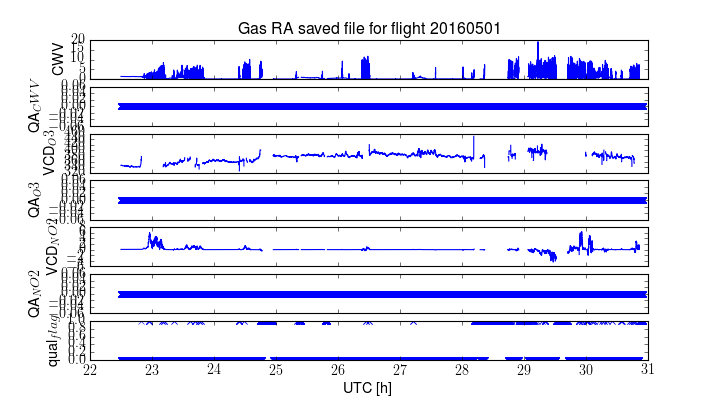

<IPython.core.display.Javascript object>


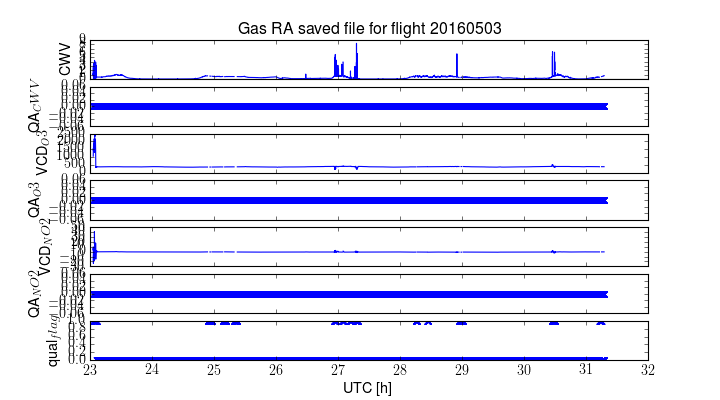

<IPython.core.display.Javascript object>


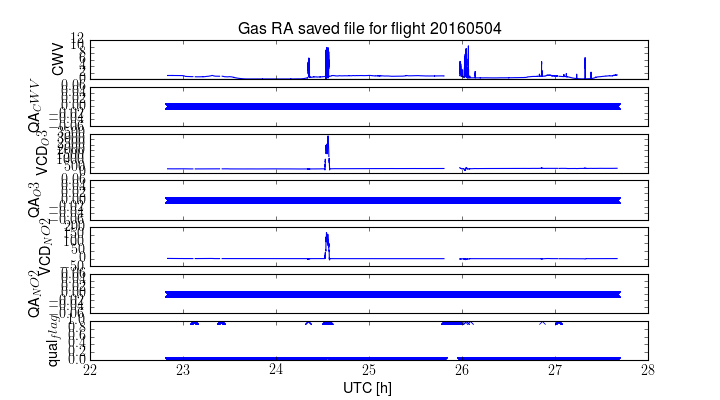

<IPython.core.display.Javascript object>


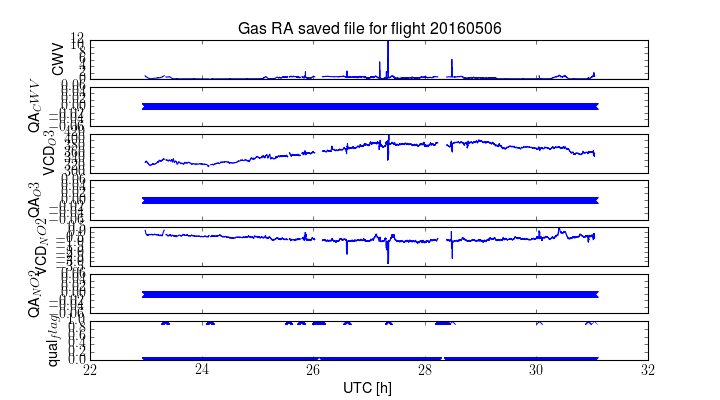

In [36]:
for i,d in enumerate(days):
    fig,ax = plt.subplots(7,sharex=True,figsize=(9,5))
    ax = ax.ravel()
    ax[0].set_title('Gas RA saved file for flight {}'.format(d))
    
    ax[0].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['CWV'])
    ax[0].set_ylabel('CWV')
    #ax[0].set_ylim(0,3)
    ax[0].axhline(0,color='k')
    #box = ax[0].get_position()
    #ax[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #ax[0].legend(frameon=False,loc='center left',bbox_to_anchor=(1.1,-0.2),numpoints=1)
    ax[1].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_CWV'],'x')
    ax[1].set_ylabel('QA_CWV')
    
    ax[2].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_O3'])
    ax[2].set_ylabel('VCD_O3')
    
    ax[3].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_O3'],'x')
    ax[3].set_ylabel('QA_O3')
    
    ax[4].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['VCD_NO2'])
    ax[4].set_ylabel('VCD_NO2')
    
    ax[5].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['QA_NO2'],'x')
    ax[5].set_ylabel('QA_NO2')
    
    ax[6].plot(outgas_RA[i]['Start_UTC'],outgas_RA[i]['qual_flag'],'x')
    ax[6].set_ylabel('qual_flag')
    
    ax[6].set_xlabel('UTC [h]')